In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from IPython.display import clear_output
from qiskit.circuit import Parameter
plt.style.use("default")

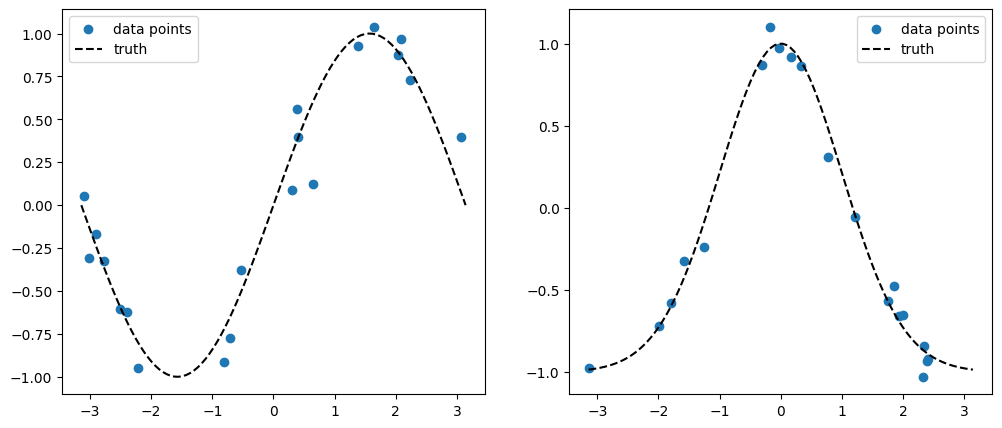

In [5]:
np.random.seed(5992936)
f1 = lambda x : np.sin(x)
X1 = np.random.uniform(-np.pi, np.pi, 20)
y1 = f1(X1) + np.random.normal(0, 0.2, 20)

f2 = lambda x : 2 * np.exp(-x**2/2) - 1
X2 = np.random.uniform(-np.pi, np.pi, 20)
y2 = f2(X2) + np.random.normal(0, 0.1, 20)

fig1, ax1 = plt.subplots(1, 2, figsize = (12, 5))
ax1[0].scatter(X1, y1, label = "data points")
ax1[0].plot(np.linspace(-np.pi, np.pi, 100), f1(np.linspace(-np.pi, np.pi, 100)), c = "black", ls = "--", label = "truth")
ax1[1].scatter(X2, y2, label = "data points")
ax1[1].plot(np.linspace(-np.pi, np.pi, 100), f2(np.linspace(-np.pi, np.pi, 100)), c = "black", ls = "--", label = "truth")
ax1[0].legend()
ax1[1].legend()

## Regression with Estimator QNN

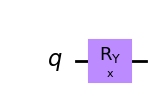

In [6]:
#feature map
fm = QuantumCircuit(1, name = "Feature Map")
input1 = Parameter("x")
fm.ry(input1, 0)
fm.draw("mpl")

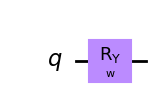

In [7]:
#ansatz
ansatz = QuantumCircuit(1, name = "Ansatz")
weight = Parameter("w")
ansatz.ry(weight, 0)
ansatz.draw("mpl")

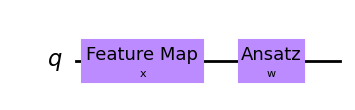

In [8]:
qc = QuantumCircuit(1)
qc.append(fm, [0])
qc.append(ansatz, [0])
qc.draw("mpl")

In [9]:
#construction of qnn
estimator_qnn = EstimatorQNN(circuit = qc, input_params=fm.parameters, weight_params=ansatz.parameters)

In [10]:
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    fig, ax = plt.subplots(1, 1, figsize = (10, 7))
    plt.title("Objective function value against iteration", size = 18)
    plt.xlabel("Iteration", size = 18)
    plt.ylabel("Objective function value", size = 18)
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
regressor = NeuralNetworkRegressor(neural_network=estimator_qnn, loss="squared_error",
                                   optimizer=L_BFGS_B(maxiter=20), callback=callback_graph)

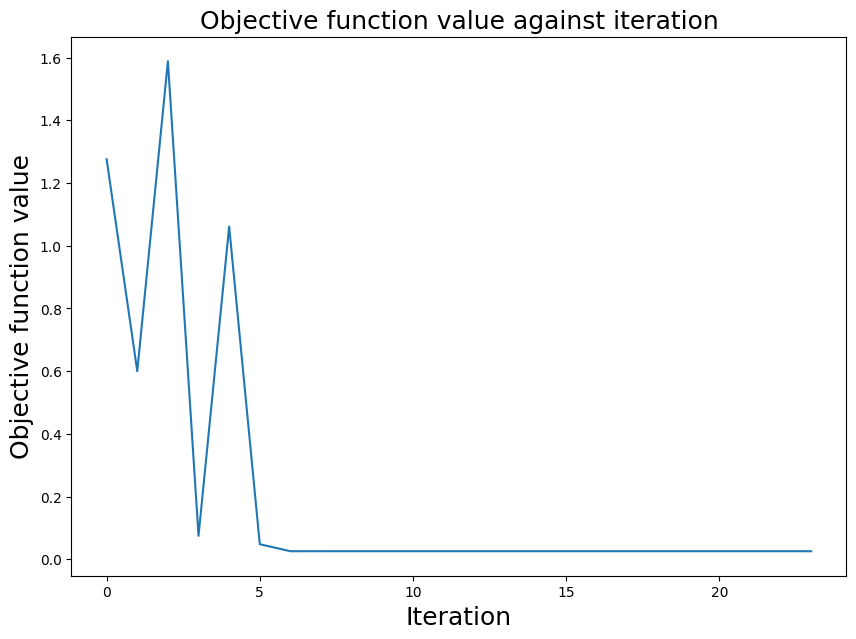

In [11]:
#training
regressor.fit(X1.reshape(20, 1), y1)

In [12]:
regressor.score(X1.reshape(20, 1), y1)

0.9372747418212818

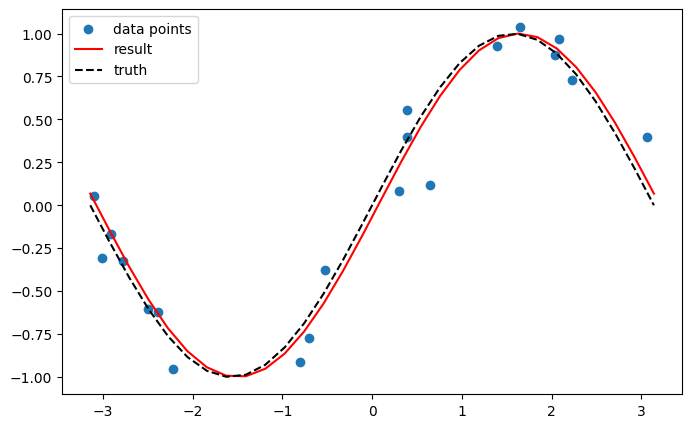

In [13]:
fig2, ax2 = plt.subplots(1, 1, figsize = (8, 5))
y_predicted = regressor.predict(np.linspace(-np.pi, np.pi, 30).reshape(30, 1))
ax2.scatter(X1, y1, label = "data points")
ax2.plot(np.linspace(-np.pi, np.pi, 30), y_predicted, c = "r", label = "result")
ax2.plot(np.linspace(-np.pi, np.pi, 30), f1(np.linspace(-np.pi, np.pi, 30)), c = "black", ls = "--", label = "truth")
ax2.legend()

## Variational Quantum Regressor

In [14]:
vqr = VQR(feature_map=fm, ansatz=ansatz, optimizer=L_BFGS_B(maxiter=5), callback=callback_graph)

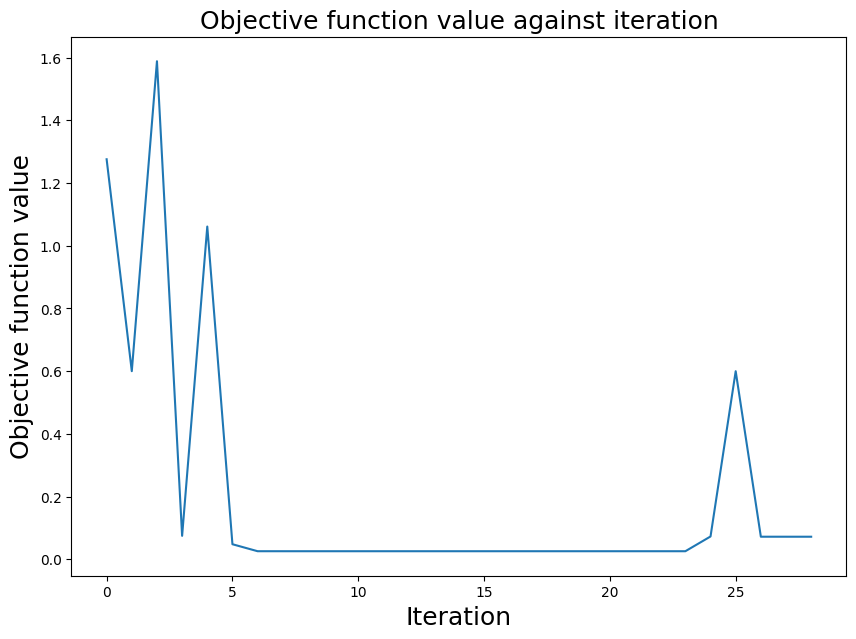

In [15]:
vqr.fit(X2.reshape(20, 1), y2)

In [16]:
vqr.score(X2.reshape(20, 1), y2)

0.8651854883649074

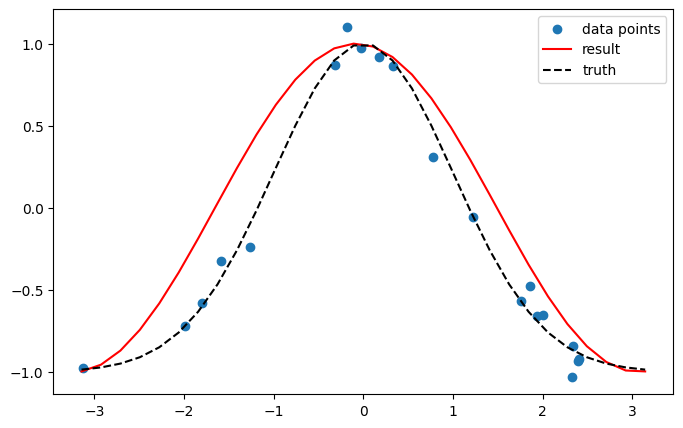

In [17]:
fig3, ax3 = plt.subplots(1, 1, figsize = (8, 5))
y_predicted = vqr.predict(np.linspace(-np.pi, np.pi, 30).reshape(30, 1))
ax3.scatter(X2, y2, label = "data points")
ax3.plot(np.linspace(-np.pi, np.pi, 30), y_predicted, c = "r", label = "result")
ax3.plot(np.linspace(-np.pi, np.pi, 30), f2(np.linspace(-np.pi, np.pi, 30)), c = "black", ls = "--", label = "truth")
ax3.legend()